## Лабораторная работа 1
## Устройство изображения. Работа с изображением в Python.¶
## Котов И. Ю.
## РИМ-181226

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_int
from numpy import dstack, roll, clip
from numpy import histogram
import numpy as np
from skimage.transform.integral import integral_image
from skimage.transform import integrate

%matplotlib inline

### Считывание изображения

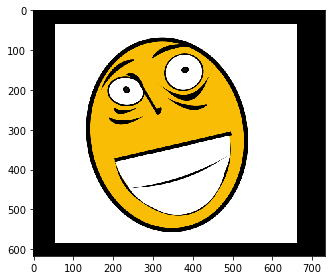

In [3]:
img = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\img_with_border.png')
imshow(img)

### Изменение цвета пикселя изображения

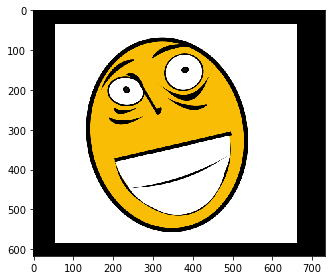

In [4]:
c = (img.shape[1])//2
r = (img.shape[0])//2
img[r,c]=[102,255,10,202]
imshow(img)

### Изменение цвета области изображения

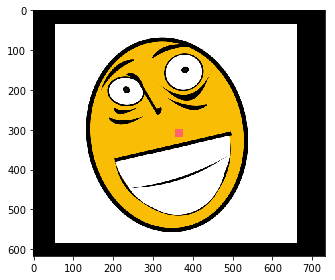

In [5]:
r1 = r - 10
r2 = r + 10
c1 = c - 10
c2 = c + 10
img[r1:r2,c1:c2]=[255,102,106,255]
imshow(img)

## Определение рамки на изображении

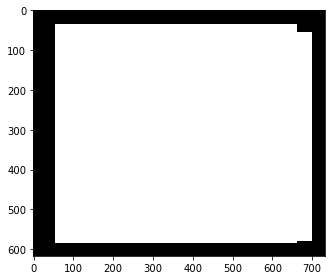

In [11]:
h=img.shape[0]-1
w=img.shape[1]-1
xs=w//2
ys=h//2

x1,x2,x3,x4 = [0]*4

for i in range(w):
    if any(img[0,0]!=img[ys,i]):
        break
    x1+=1
for i in range(h):
    if any(img[0,0]!=img[i,xs]):
        break
    x2+=1
for i in range(w):
    if any(img[0,0]!=img[ys,w-i]):
        break
    x3+=1
for i in range(h):
    if any(img[0,0]!=img[h-i,xs]):
        break
    x4+=1    
    
img[x1:h-x2,x3:w-x4]=[0,0,0,0]
imshow(img) 

## Получение негатива изображения

In [14]:
img = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\img_with_border.png')

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

rn = 255 - r
gn = 255 - g
bn = 255 - b

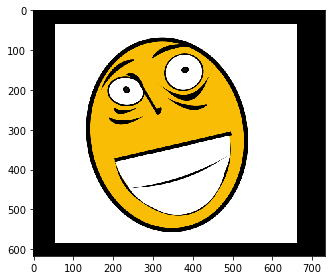

In [20]:
imshow(dstack([r,g,b]))

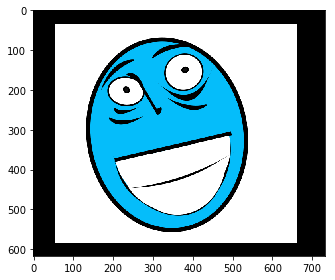

In [17]:
imshow(dstack([b,g,r]))

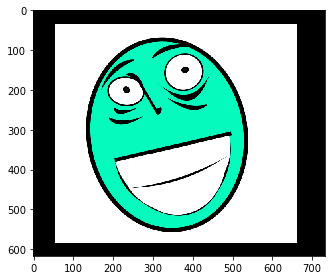

In [18]:
imshow(dstack([b,r,g]))

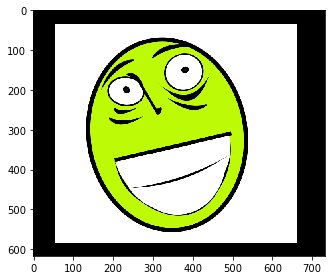

In [19]:
imshow(dstack([g,r,b]))

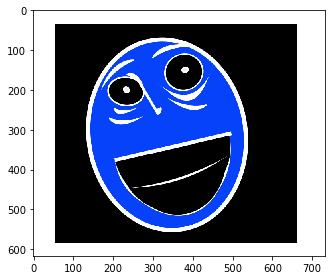

In [16]:
imshow(dstack([rn,gn,bn]))

## Сопоставление фотографий Прокудина-Горского

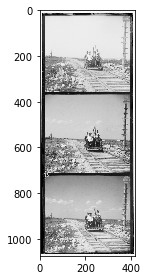

In [44]:
img = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\img3.png')
img = img_as_float(img)
imshow(img)

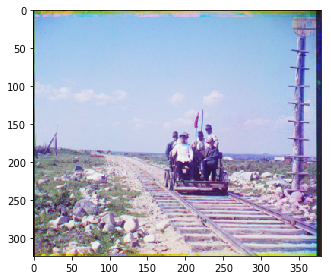

In [52]:
def cut_image(img,cut):
    cut1 = img[int(len(img)*cut):len(img)-int(len(img)*cut)]
    cut1_t = cut1.transpose()
    return cut1_t[int(len(cut1_t)*0.05):len(cut1_t)-int(len(cut1_t)*0.05)].transpose()

def get_shift(img_col1, img_col2):
    
    max_similar = 0
    
    for i in range(-10,10, 1):
        
        img_col1_new_i = roll(img_col1, i, 1)
        
        for j in range(-10, 10, 1):
            
            img_col1_new_j = roll(img_col1_new_i, j, 0)
            
            similar = (img_col1_new_j * img_col2).sum()
            
            if (similar >= max_similar):
                
                max_similar = similar
                ixd = i
                jyd = j
    
    return (ixd, jyd)

size=math.floor(img.shape[0]/3)

b = cut_image(img[:size], 0.05)
g = cut_image(img[size:size*2], 0.05)
r = cut_image(img[size*2:size*3], 0.05)

bn = roll(b, get_shift(b, g), (1, 0))
rn = roll(r, get_shift(r, g), (1, 0))

imshow(np.dstack([rn, g, bn]))